In [33]:
# imports
import numpy as np
from IPython.core.display import Image, display
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 10,8

# Estadística descriptiva aplicada a datos

### Ciencia de Datos para físicos: teoría y aplicaciones.

En este notebook repasaremos los conceptos de estadística descriptiva visto en los notebooks anteriores. Aprenderemos la sintáxis básica de la libreria pandas, también aumentaremos nuestra capacidad de visualización con seaborn.

In [34]:
# El conjunto de datos se encuentra en un archivo .csv, el cual es tabular y similar a un .xls (excel)
# Los datos se pueden leer con la libreria pandas como sigue
data = pd.read_csv('../Datasets/2c_california_housing.csv')

In [35]:
# El objeto data contiene una tabla con los datos mencionados, la tabla tiene una cabecera o header
# ¿cómo se ve o cómo es?
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Atributos del dataset California Housing:
* housingMedianAge: Edad promedio de una casa dentro de un bloque; un número más bajo corresponde a un edificio más nuevo.
* totalRooms: Número total de habitaciones de un bloque
* totalBedrooms: Número total de dormitorios de un bloque
* population: Número total de personas que residen en un bloque
* households: Número total de hogares, grupo de personas que residen en una unidad doméstica, de un bloque
* medianIncome: Ingresos promedio de los hogares de un bloque de viviendas (medida en decenas de miles de dólares estadounidenses)
* Latitude: house block latitude
* Longitude: house block longitude
* medianHouseValue: Valor medio de la vivienda de los hogares de una manzana (en dólares estadounidenses)
* oceanProximity: ¿Qué tan cerca está la casa del mar?

Cosas a considerar:
* Un grupo de bloques es la unidad geográfica más pequeña para la que la Oficina del Censo de EE.UU. publica datos por muestreo
* Un hogar es un grupo de personas que residen en una vivienda


In [36]:
# Cuando el dataset es muy grande en filas, mostrar el dataset completo suele ser muy tardado
# o simplemente nos interesa ver las primeras filas para ello usamos un método de pandas llamado
# head, el cual nos muestra las primeras filas del dataset o tail para las últimas filas
data.tail(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20620,-121.48,39.05,40.0,198.0,41.0,151.0,48.0,4.5625,100000.0,INLAND
20621,-121.47,39.01,37.0,1244.0,247.0,484.0,157.0,2.3661,77500.0,INLAND
20622,-121.44,39.00,20.0,755.0,147.0,457.0,157.0,2.4167,67000.0,INLAND
20623,-121.37,39.03,32.0,1158.0,244.0,598.0,227.0,2.8235,65500.0,INLAND
20624,-121.41,39.04,16.0,1698.0,300.0,731.0,291.0,3.0739,87200.0,INLAND
20625,-121.52,39.12,37.0,102.0,17.0,29.0,14.0,4.1250,72000.0,INLAND
20626,-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0,INLAND
20627,-121.32,39.13,5.0,358.0,65.0,169.0,59.0,3.0000,162500.0,INLAND
20628,-121.48,39.10,19.0,2043.0,421.0,1018.0,390.0,2.5952,92400.0,INLAND
20629,-121.39,39.12,28.0,10035.0,1856.0,6912.0,1818.0,2.0943,108300.0,INLAND


In [37]:
# ¿Recuerdas el slincing de listas? pues pandas también lo soporta
data[50:70]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
50,-122.27,37.82,21.0,896.0,453.0,735.0,438.0,0.9218,171900.0,NEAR BAY
51,-122.27,37.82,43.0,1868.0,456.0,1061.0,407.0,1.5045,93800.0,NEAR BAY
52,-122.27,37.82,41.0,3221.0,853.0,1959.0,720.0,1.1108,97500.0,NEAR BAY
53,-122.27,37.82,52.0,1630.0,456.0,1162.0,400.0,1.2475,104200.0,NEAR BAY
54,-122.28,37.82,52.0,1170.0,235.0,701.0,233.0,1.6098,87500.0,NEAR BAY
55,-122.28,37.82,52.0,945.0,243.0,576.0,220.0,1.4113,83100.0,NEAR BAY
56,-122.28,37.82,52.0,1238.0,288.0,622.0,259.0,1.5057,87500.0,NEAR BAY
57,-122.28,37.82,52.0,1489.0,335.0,728.0,244.0,0.8172,85300.0,NEAR BAY
58,-122.28,37.82,52.0,1387.0,341.0,1074.0,304.0,1.2171,80300.0,NEAR BAY
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY


Una de las primeras cosas que debemos hacer es entender el tipo de cada columna, es decir si es númerica o categórica. Saber si existen valores nulos o no. Para esto usaremos la función `info()` de pandas.

Un valor nulo se ve así: `NaN` (Not a Number). En pandas se representa como `np.nan` o `None`.

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


La columna Dtype nos da una idea del tipo de dato que contiene la columna. Ojo que sea float no significa que la variable es necesariamente continua, puede ser discreta. Por ejemplo, la edad de una persona es una variable discreta, pero en pandas puede ser representada como float.

Observemos que la columna `oceanProximity` es de tipo `object`, esto significa que puede tratarse de una variable categórica. El tipo object es el tipo genérico de pandas, que puede contener cualquier tipo de dato (listas, strings, diccionarios, etc). Para saber si es categórica o no, debemos observar los valores que toma la columna.

Observa la fila 4, total_bedrooms. Su columna asociada Non-Null Count es menor que el número de filas (RangeIndex: 20640), esto significa que hay valores nulos en esa columna.

Los valores nulos son un caso especial que debemos tratar. Estos valores nulos se producen ya sea por errores humanos (suponiendo que se trató de una encuesta), que no se pudo obtener la información, entre otras razones.

Son un caso especial ya que pueden tomarse dos caminos: 1) eliminar aquellas filas que contengan al menos un valor nulo, sabiendo que esa información se pierde. 2) reemplazar los valores nulos por algún valor, por ejemplo, la media de la columna, este método podría introducir algún sesgo en los datos.

Por ejemplo, supongamos que los valores nulos se dan en la columna `oceanProximity` y la moda de esa columna es `NEAR BAY`. Si decidimos rellenar esos valores con dicha moda, estamos introduciendo un sesgo en los datos, ya que la moda es un valor que se da con mayor frecuencia, pero no necesariamente es el valor más probable. Además, la longitud y la latitud es más útil para inferir este tipo de cercanía, pero ¿Qué pasa si no tenemos esa información? ¿Cómo podemos rellenar los valores nulos? y en caso de rellenarlos así ¿Qué tipo de sesgo estamos introduciendo?

Lo mismo pasa con la columna `total_bedrooms`, si rellenamos los valores nulos con la media, estamos introduciendo un sesgo en los datos.

Entonces, habrá casos donde sí conviene rellenar los valores nulos, pero habrá otros donde no. Esto depende en su mayoria del tipo de columna, el tipo de datos que se tiene y el problema que se quiere resolver. No hay una regla general y eso es parte del expertís del científico de datos.

In [39]:
#veamos que pasa con la columna ocean_proximity
data['ocean_proximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [40]:
# Parece que puede tratarse como una variable discreta o categórica
# pero ¿Cómo estoy tan seguro de ello? ¿Cómo puedo saber que tipo de variable es?
# Para ello podemos usar el método value_counts
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

El método value counts agrupa los valores de una columna y cuenta cuántas veces aparece cada uno. Dado que solo hay 5 valores posibles, podemos tratar estos valores como categoricos.

La gran mayoría de veces, el científico de datos se enfrenta a datasets con muchas columnas, por lo que no es posible visualizar todos los valores posibles de cada columna una por una. En esos casos, es necesario hacer un análisis estadístico de los datos, además de observar e inferir que valores toman para saber o interpretar el tipo de dato categorico o continuo de cada columna.

In [41]:
# Una vista muy general de la estadística descriptiva de los datos se puede obtener con el método describe
data.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [42]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
longitude,20640.0,NaN,NaN,NaN,-119.569704,2.003532,-124.35,-121.8,-118.49,-118.01,-114.31
latitude,20640.0,NaN,NaN,NaN,35.631861,2.135952,32.54,33.93,34.26,37.71,41.95
housing_median_age,20640.0,NaN,NaN,NaN,28.639486,12.585558,1.0,18.0,29.0,37.0,52.0
total_rooms,20640.0,NaN,NaN,NaN,2635.763081,2181.615252,2.0,1447.75,2127.0,3148.0,39320.0
total_bedrooms,20433.0,NaN,NaN,NaN,537.870553,421.38507,1.0,296.0,435.0,647.0,6445.0
population,20640.0,NaN,NaN,NaN,1425.476744,1132.462122,3.0,787.0,1166.0,1725.0,35682.0
households,20640.0,NaN,NaN,NaN,499.53968,382.329753,1.0,280.0,409.0,605.0,6082.0
median_income,20640.0,NaN,NaN,NaN,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,NaN,NaN,NaN,206855.816909,115395.615874,14999.0,119600.0,179700.0,264725.0,500001.0
ocean_proximity,20640,5,<1H OCEAN,9136,NaN,NaN,NaN,NaN,NaN,NaN,NaN


¿Qué hace el método .T?

El método describe() nos da un resumen estadístico de las columnas numéricas (los rangos intercuartilícos, la desviación estandár y la media). El método describe() no incluye las columnas categóricas, ya que no tiene sentido calcular la media, la desviación estándar, etc. de una variable categórica. Para forzarlo a que incluya las columnas categóricas, debemos pasarle el parámetro `include='all'`.

Ojo: el hecho de que todas las columnas continuas tengan una media y una std no significa que su distribución sea normal. Puede inferirse que la distribución es normal si la media y la mediana son cercanas, pero no es una regla general.

El método describe no nos fue de mucha útilidad para saber que otras columnas son categóricas, únicamente nos confirmó que la columna `oceanProximity` es categórica.

Para conocer si es categorica o no, debemos, además de observar los valores que toma, hacernos las algunas relevantes a cada columna.

Por ejemplo; tomemos la columna `housing_median_age`. ¿Qué valores toma? ¿Los valores tienen centesimas, milesimas, etc mayores a 0? o solamente son de la forma xx.0? Si es así, podemos inferir que es una variable discreta. Si los valores tienen centesimas, milesimas, etc mayores a 0, podemos inferir que es una variable continua. Otra pregunta relevante podría ser ¿Tiene sentido que los valores sean discretos? ¿Tiene sentido que los valores sean continuos?

### Descriptiva univariada

La estadística descriptiva univariada es la que se realiza sobre una sola variable. Veamos algunos ejemplos.

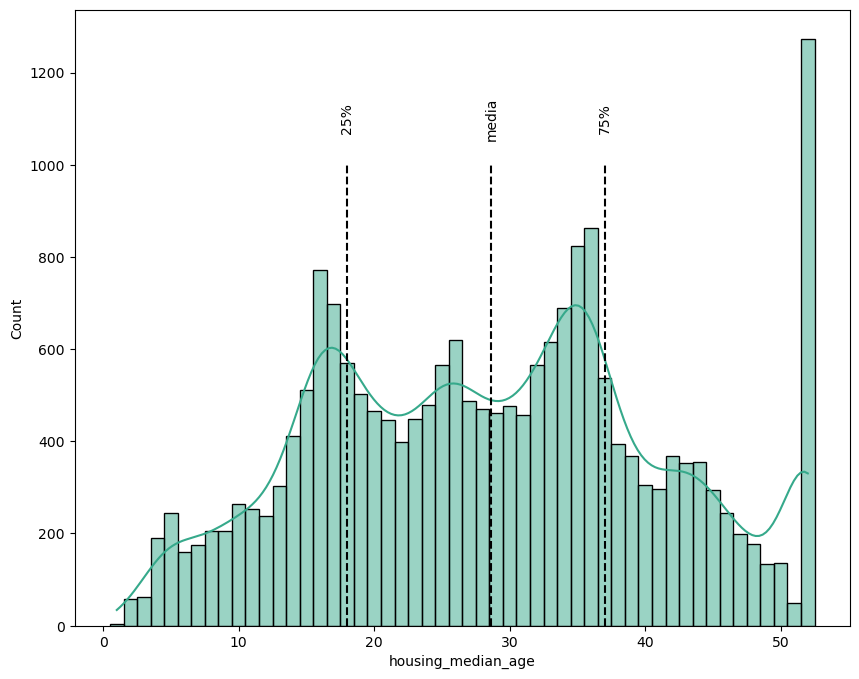

In [43]:
# Tomemos la columna housing_median_age y grafiquemos su histograma
# dado que sabemos por el método describe que el minimo es 1 y el máximo 52
# podemos tomar 52 bins
#¿Qué pasa cuando los bins aumentan? ¿Y cuando disminuyen?
# Gráfiquemos ahora su PDF
sns.histplot(data=data, x="housing_median_age", kde=True, bins=52, discrete=True, color='#36a98b')
plt.vlines(28.639486, 0,1000, color='black', linestyle='--')
plt.text(28.639486, 1100, 'media', ha='center', va='center',rotation='vertical')
plt.vlines(18.0, 0,1000, color='black', linestyle='--')
plt.text(18.0, 1100, '25%', ha='center', va='center',rotation='vertical')
plt.vlines(37.0, 0,1000, color='black', linestyle='--')
plt.text(37.0, 1100, '75%', ha='center', va='center',rotation='vertical');

Si compraramos una casa al azar ¿Qué edades son los más probables?

Veamos ahora si existen outliers y el rango intercuartilíco con un boxplot

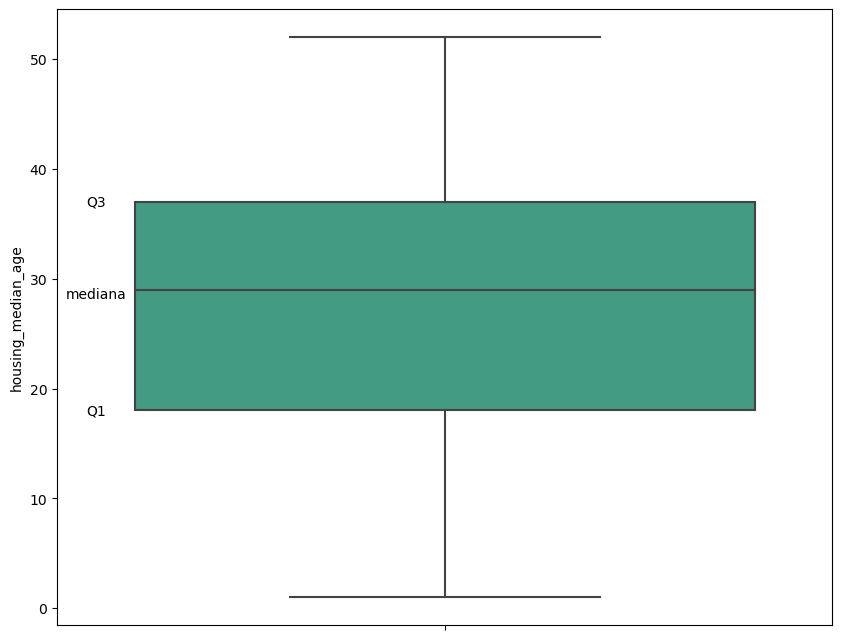

In [44]:
# Gráfiquemos ahora su boxplot
sns.boxplot(data=data, y="housing_median_age", color='#36a98b')
plt.text(-0.45,28.639486, 'mediana', ha='center', va='center',rotation='horizontal')
plt.text(-0.45,18.0, 'Q1', ha='center', va='center',rotation='horizontal')
plt.text(-0.45,37.0, 'Q3', ha='center', va='center',rotation='horizontal');

Recuerda la interpretación de las Q's:
* El 25% de los datos son menores que el Q1, para este caso el 25% de las casas tienen una edad menor a 18 años.
* El 50% de los datos son menores que el Q2 o la mediana , para este caso el 50% de las casas tienen una edad menor a 29 años.
* El 75% de los datos son menores que el Q3, para este caso el 75% de las casas tienen una edad menor a 37 años.

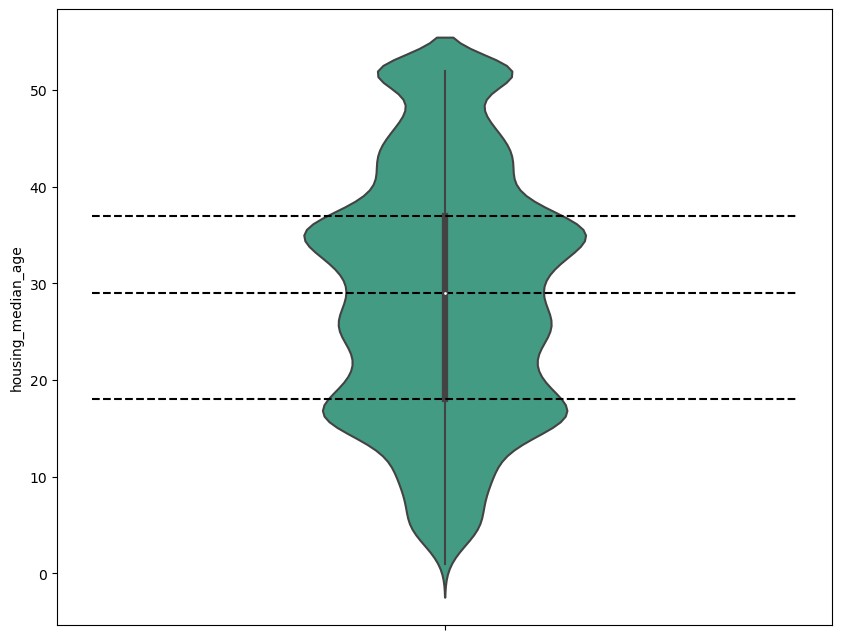

In [45]:
# existe otra herramienta que tambien es poderosa, se llama violin plot, la cual es similar a un boxplot
sns.violinplot(data=data, y="housing_median_age", color='#36a98b')
plt.hlines(29.0, -1,1, color='black', linestyle='--')
plt.hlines(18.0, -1,1, color='black', linestyle='--')
plt.hlines(37.0, -1,1, color='black', linestyle='--');

Observa la forma de la curva que cubre el violin plot ¿La viste en algún lado de este notebook? ¿A qué distribución corresponde?

El violinplot es muy pero muy útil para comparar la distribución de dos variables una continua y otra categórica. Por ejemplo, si queremos comparar la distribución de la edad de las casas en función de la cercanía al océano. En el análisis bivariado veremos un ejemplo.

Ahora analicemos una variable categórica.

In [46]:
# analisis frecuentista
# Frecuencia absoluta
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

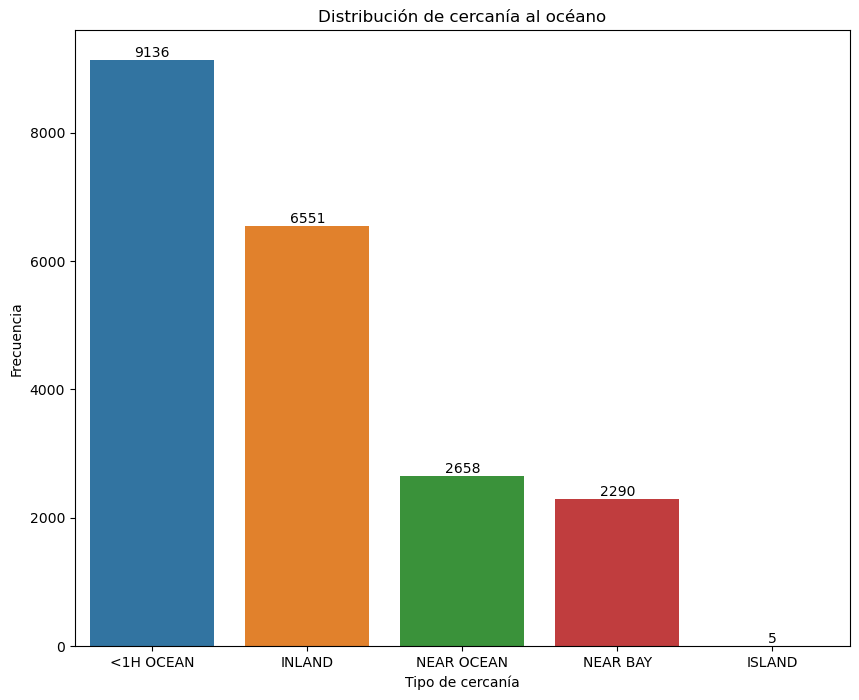

In [47]:
# frecuencia absoluta visual
#obten el nombre de las categorias
tipo_cercania = data['ocean_proximity'].value_counts().index
#obten las veces que se repite cada categoria
frecuencia = data['ocean_proximity'].value_counts().values

fig, ax = plt.subplots(figsize = (10,8))
_ = sns.barplot(x = tipo_cercania, y = frecuencia)
_ = ax.set_title('Distribución de cercanía al océano')
_ = ax.set_xlabel('Tipo de cercanía')
_ = ax.set_ylabel('Frecuencia')

#sirve para poner los numeros encima de las barras	
for i in ax.containers:
    ax.bar_label(i)

In [48]:
# Frecuencia relativa
# ¿Qué porcentaje de las categorías representa el conjunto de datos?
data['ocean_proximity'].value_counts(normalize=True)

<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

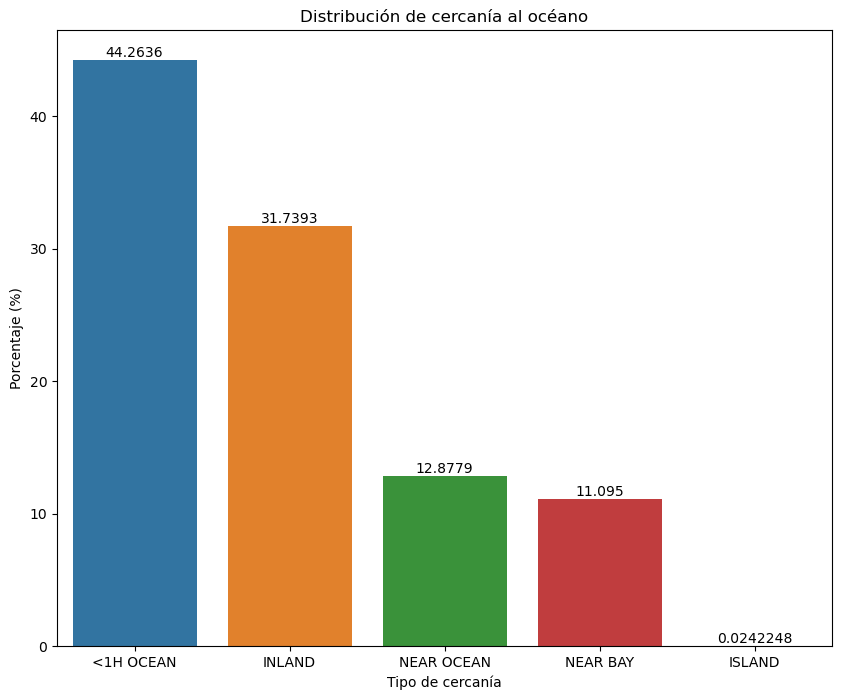

In [49]:
# frecuencia relativa visual
#obten el nombre de las categorias
tipo_cercania = data['ocean_proximity'].value_counts().index
#obten el porcentaje de cada categoria
frecuencia = (data['ocean_proximity'].value_counts(normalize=True).values)*100

fig, ax = plt.subplots(figsize = (10,8))
_ = sns.barplot(x = tipo_cercania, y = frecuencia)
_ = ax.set_title('Distribución de cercanía al océano')
_ = ax.set_xlabel('Tipo de cercanía')
_ = ax.set_ylabel('Porcentaje (%)')

#sirve para poner los numeros encima de las barras	
for i in ax.containers:
    ax.bar_label(i)

Se observa que una cantidad muy pequeña de casas se encuentran en "isla". Observar esto es importante ya que si queremos un modelo que prediga el precio de una casa en una isla, no tendremos suficientes datos para entrenar el modelo.

In [50]:
# Frecuencia acumulada
data['ocean_proximity'].value_counts(normalize=True).cumsum()

<1H OCEAN     0.442636
INLAND        0.760029
NEAR OCEAN    0.888808
NEAR BAY      0.999758
ISLAND        1.000000
Name: ocean_proximity, dtype: float64

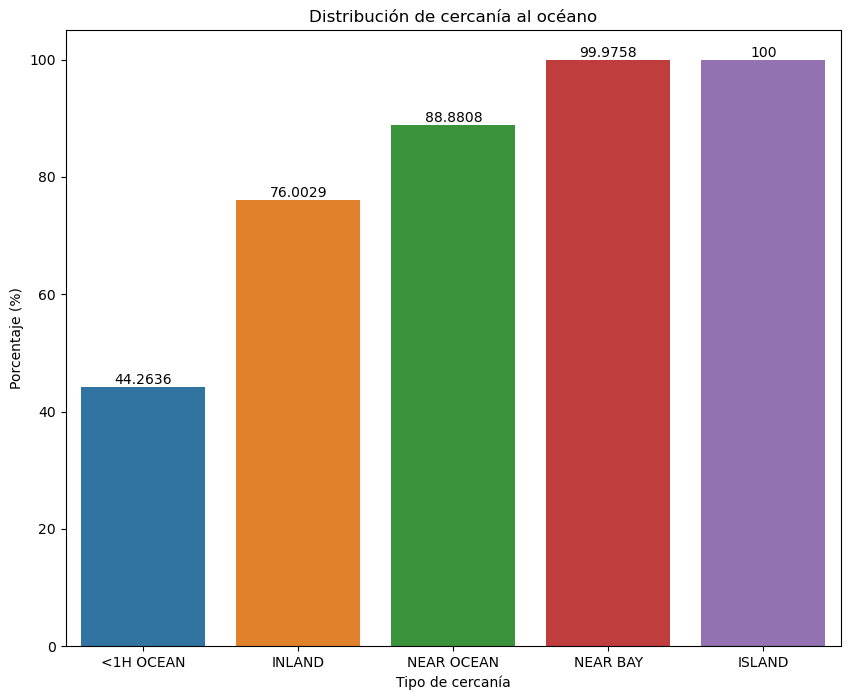

In [51]:
# frecuencia acumulada visual
#obten el nombre de las categorias
tipo_cercania = data['ocean_proximity'].value_counts().index
#obten el porcentaje acumulado de cada categoria
frecuencia = (data['ocean_proximity'].value_counts(normalize=True).cumsum().values)*100

fig, ax = plt.subplots(figsize = (10,8))
_ = sns.barplot(x = tipo_cercania, y = frecuencia)
_ = ax.set_title('Distribución de cercanía al océano')
_ = ax.set_xlabel('Tipo de cercanía')
_ = ax.set_ylabel('Porcentaje (%)')

#sirve para poner los numeros encima de las barras	
for i in ax.containers:
    ax.bar_label(i)

De este último gráfico podemos observar que el 88.8% de loss datos están representadas por las categorías `NEAR OCEAN`, `INLAND` y `<1H Ocean`.

### Variables Continuas y Discretas, pequeño resumen

#### Variables discretas.
Las variables discretas son aquellas que pueden tomar valores enteros o categoricos. Es decir, están representados por texto o valores cuantizables que describen una o varias características.

Estas variables pueden ser de dos tipos:
* Ordinales: Son aquellas que tienen un orden, por ejemplo, el tamaño de una camisa (S, M, L, XL).
* Nominales: Son aquellas que no tienen un orden, por ejemplo, el color de una camisa (rojo, azul, verde, amarillo).

Para analizar este tipo de variables, comunmente se contesta a preguntas como:
* ¿Cuántas categorías únicas existen?
* ¿Cuántas veces aparece cada categoría?
* ¿Cuál es la categoría más frecuente?
* ¿Cuál es la categoría menos frecuente?
* ¿Cuántas y qué categorías representan el n% (70-90) de la muestra?
* De las categorías más frecuentes ¿Existe alguna relación entre ellas?

La descripción de las variables discretas se puede realizar con frecuencias relativas, absolutas y acumuladas.

#### Variables continuas.
Las variables continuas son aquellas que pueden tomar valores reales. Es decir, están representados por números reales.

Estas variables pueden ser de dos tipos:
* Discretas: Poseen un número finito de valores posibles, por ejemplo, la talla de zapatos (34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44).
* Continuas: Poseen un número infinito de valores posibles, por ejemplo, la estatura de una persona.

Para analizar este tipo de variables, comunmente se contesta a preguntas como:
* ¿Cuál es el valor mínimo?
* ¿Cuál es el valor máximo?
* ¿Cuál es el valor medio?
* ¿Cuál es la mediana?
* ¿En qué magnitud se encuentran los valores?
* ¿Cuál es el rango?
* ¿Cuál es la desviación estándar?
* ¿Qué forma tiene su distribución?
* ¿Existen valores atípicos? y ¿Cuántos son?
* ¿Cuáles son los cuartos Q1, Q2 y Q3? ¿A partir de qué Q existe mayor densidad?

La descripción de las variables discretas se puede realizar con histogramas, boxplots, violinplots, KDE plots, CDF plot e IQR.

### Descriptiva bivariada

Una pregunta natural que puede surgir es ¿Cuál es la posición de cada casa enm función de su longitud y latitud? ¿Cuál es la densidad relativa?

Esto podemos observarlo con un scatter plot. Recordando Latitud: "arriba-abajo desde el ecuador", Longitud: "izquierda-derecha".

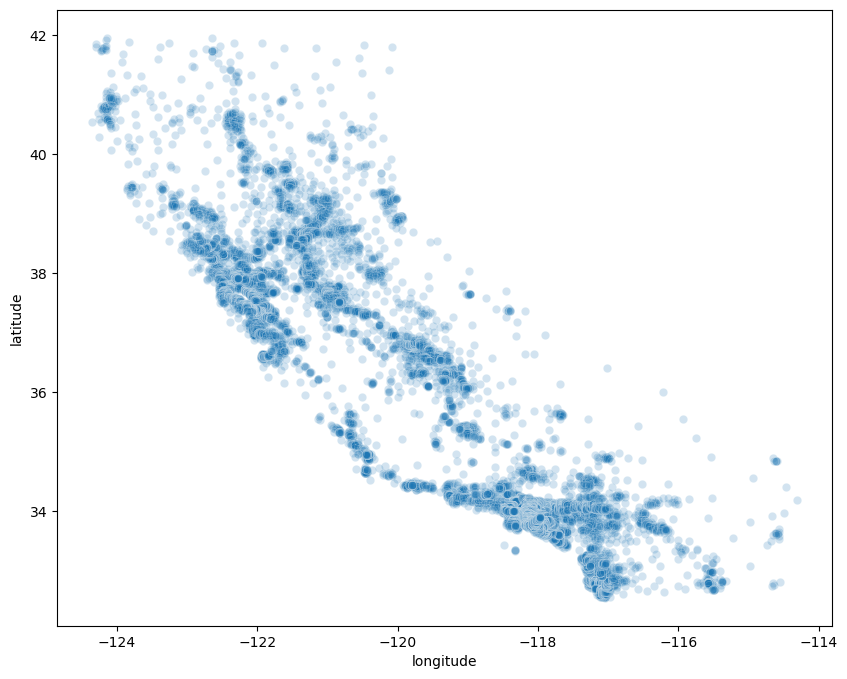

In [52]:
sns.scatterplot(data=data, x="longitude", y="latitude", alpha=0.2);

De aqui podemos observar que existen algunas casas "aisladas", es decir con poca densidad de casas en su alrededor. Esto puede ser un indicador de que estas casas son más caras. O que la zonba donde se encuentran es más cara o menos popular.

Ahora, ¿Cómo se distribuye el precio de las casas en función de la cercanía a la playa?

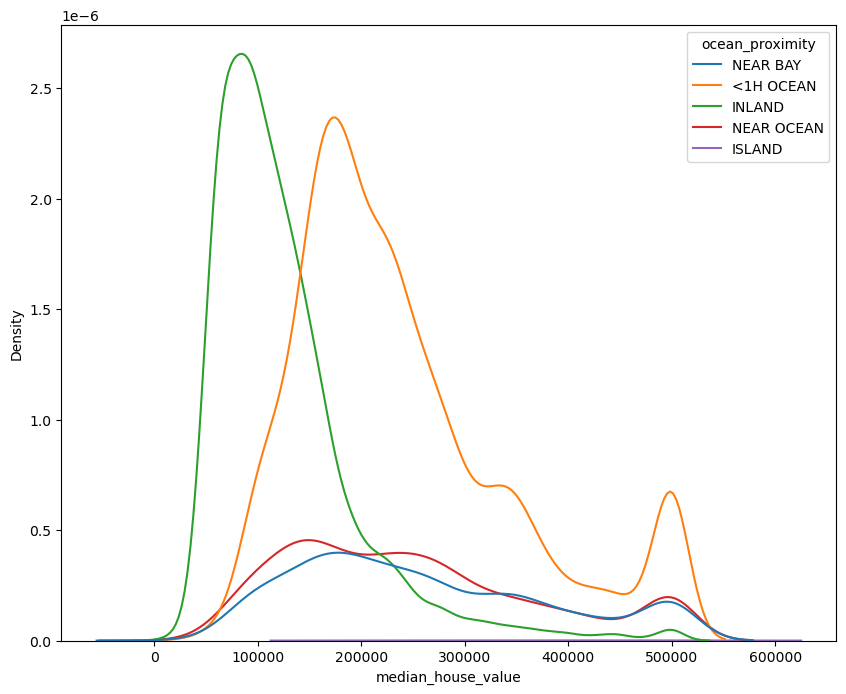

In [53]:
sns.kdeplot(data=data, x="median_house_value", hue="ocean_proximity");

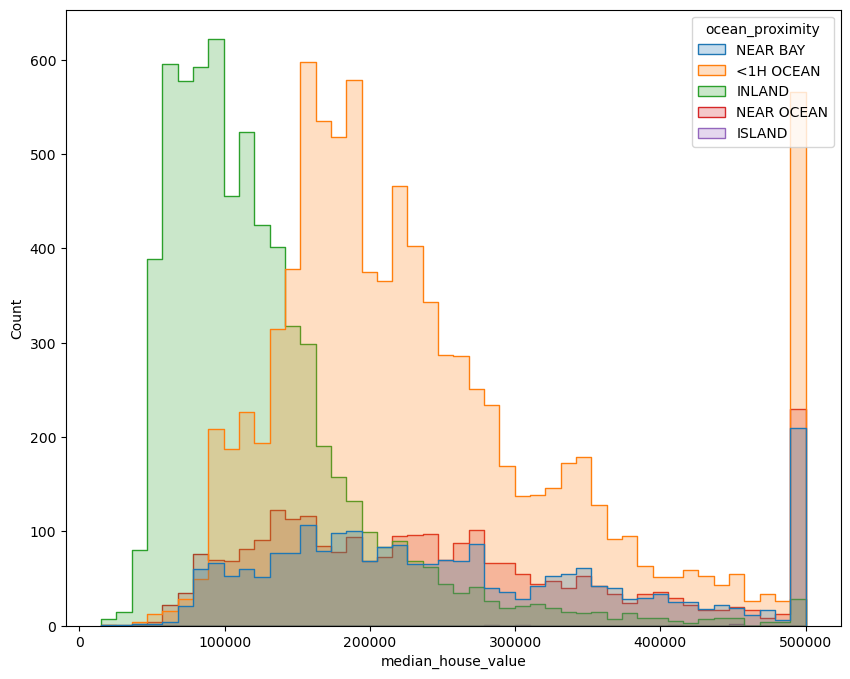

In [56]:
sns.histplot(data=data, x="median_house_value", hue="ocean_proximity",  element="step");

La mayoria de las casas lejos del mar son más baratas que las casas cerca del mar. Esto es algo casi obvio.

Ojo: Que para ti una suposición sea obvia no significa que sea verdad, por lo que siempre debes comprobarlo.

Muy bien, solo pudimos sacar una conclusión débil de este gráfico. ¿Cómo podemos sacar una conclusión más fuerte?

<AxesSubplot: xlabel='ocean_proximity', ylabel='median_house_value'>

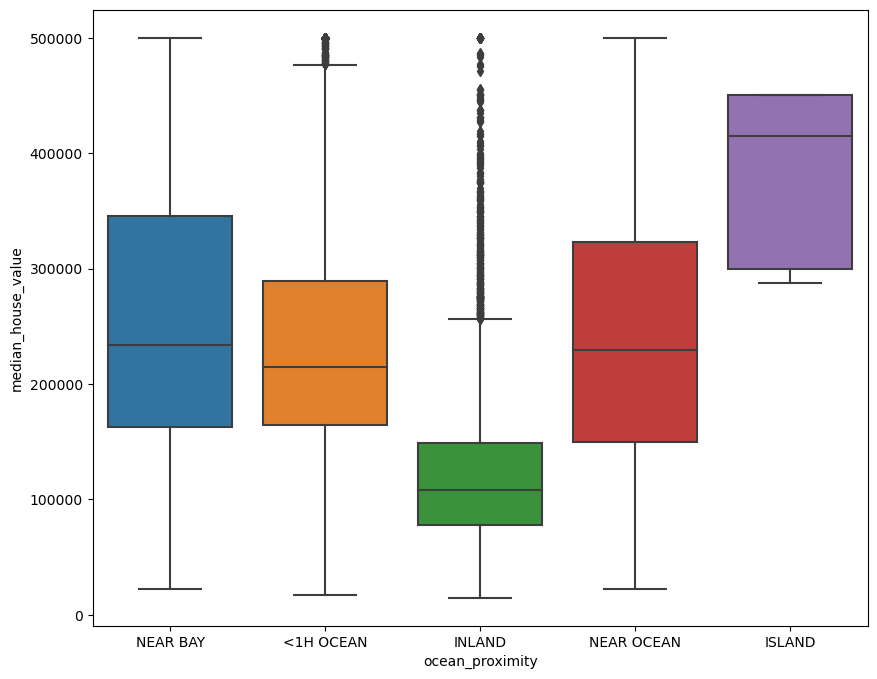

In [55]:
sns.boxplot(data=data, y="median_house_value", x="ocean_proximity")

El 75% de las casas lejos del mar son más baratas que el resto de las casas. Esto es una conclusión más fuerte.
Además, las casas en una isla parecen ser las más caras de todas, pero, recuerdas que solo hay 5 casas en una isla. Por lo que no podemos sacar una conclusión fuerte de esto. Ya que esos datos no son estadísticamente significativos.

Otra cosa interesante que podemos observar es que las casas lejos de la playa contiene muchos outliers. Esto podría ser un indicador de que hay variables ocultas que tambien afectan el precio de las casas, como quizá el barrio donde se encuentran. Como ejemplo ¿Porqué una casa en polanco vale más que una en tlahuac? si ambas estan rodeadas de color gris muerto.

¿Qué otros hints podemos sacar de este gráfico?

<AxesSubplot: xlabel='ocean_proximity', ylabel='median_house_value'>

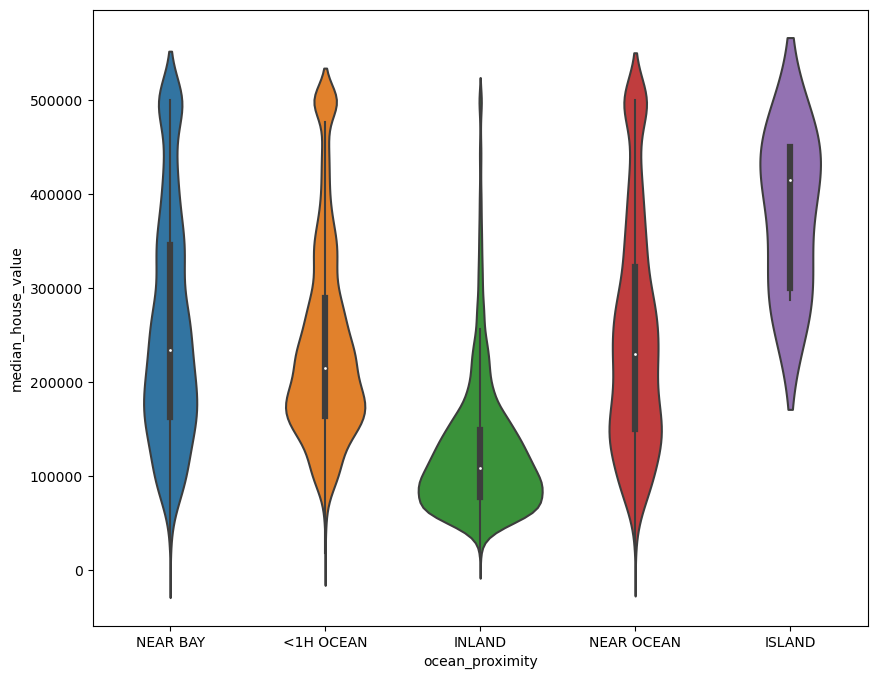

In [57]:
sns.violinplot(data=data, y="median_house_value", x="ocean_proximity")

Otro gráfico interesante es el Hexagon bin plot que nos permite ver la densidad de los datos en función de dos variables continuas.

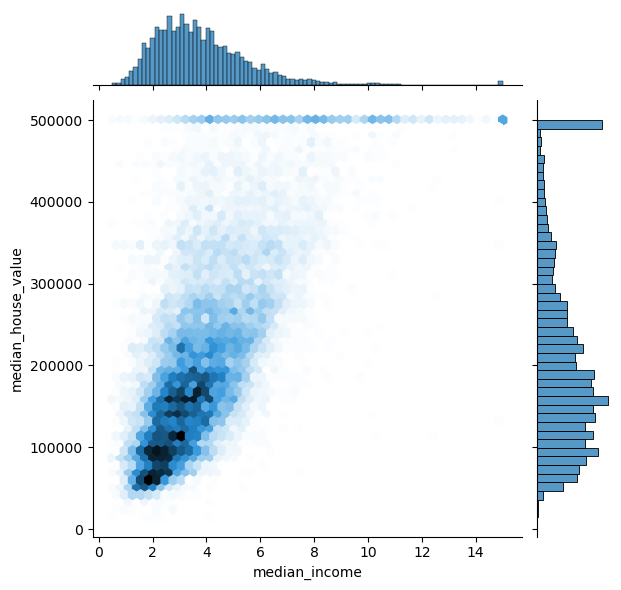

In [63]:
sns.jointplot(data=data, y="median_house_value", x="median_income", kind="hex");